In [64]:
import pandas as pd
import duckdb
import networkx as nx
import csv
import matplotlib.pyplot as plt


In [86]:
data= pd.read_csv("./onto_x.csv")
df=pd.DataFrame(data)

In [87]:
df

,Class ID,Preferred Label,Parents
0,http://entity/CST/HYPOCHLOREM,HYPOCHLOREMIA,http://entity/CST/METGEN|http://entity/CST/MAN...
1,http://entity/CST/EXTRAPYR%20SYND,EXTRAPYRAMIDAL SYNDROME,http://entity/CST/NERMOVE
2,http://entity/CST/VASCULITIS%20KIDNEY,KIDNEY VASCULITIS,http://entity/CST/PATHCOLLAGEN|http://entity/C...
3,http://entity/CST/SKIN/DERM,Dermatoses,NaN
4,http://entity/CST/FIBRO%20KIDNEY,KIDNEY FIBROSIS,http://entity/CST/UG/UT/K/M|http://entity/CST/...
...,...,...,...
1702,http://entity/STY/T122,Biomedical or Dental Material,http://entity/STY/T120
1703,http://entity/CST/WITHDRAW%20BLEED,WITHDRAWAL BLEEDING,http://entity/CST/HEMHMRG|http://entity/CST/GY...
1704,http://entity/CST/GYNECOMASTIA,GYNECOMASTIA,http://entity/CST/GENBREAST
1705,http://entity/CST/ENDO/ADR/COR,Cortex,http://entity/CST/ENDO/ADR


In [8]:
df.describe()

,Class ID,Preferred Label,Parents
count,1707,1707,1672
unique,1707,1686,720
top,http://entity/CST/HYPOCHLOREM,INFECTION,http://www.w3.org/2002/07/owl#Thing
freq,1,3,24


In [97]:
CERVIX=df[df['Parents']=='http://entity/CST/GIBOWEL']
CERVIX

,Class ID,Preferred Label,Parents
28,http://entity/CST/GASTRITIS,GASTRITIS,http://entity/CST/GIBOWEL
315,http://entity/CST/COLITIS%20PSEUDOMEM,PSEUDOMEMBRANOUS COLITIS,http://entity/CST/GIBOWEL
558,http://entity/CST/INTEST%20SMALL%20PER,SMALL INTESTINE PERFORATION,http://entity/CST/GIBOWEL
584,http://entity/CST/ULCER%20INTEST%20PER%20ILE,PERFORATED ULCER OF ILEUM,http://entity/CST/GIBOWEL
660,http://entity/CST/STENO%20INTEST%20SMALL,SMALL INTESTINE STENOSIS,http://entity/CST/GIBOWEL
756,http://entity/CST/COLITIS%20ULCER,ULCERATIVE COLITIS,http://entity/CST/GIBOWEL
765,http://entity/CST/STENO%20INTEST%20COLON,STENOSIS OF COLON,http://entity/CST/GIBOWEL
831,http://entity/CST/ULCER%20INTEST%20SMALL,SMALL INTESTINE ULCER,http://entity/CST/GIBOWEL
1104,http://entity/CST/STENO%20INTEST%20ILE,STENOSIS OF ILEUM,http://entity/CST/GIBOWEL
1222,http://entity/CST/ULCER%20INTEST%20JEJ,ULCER OF JEJUNUM,http://entity/CST/GIBOWEL


In [102]:
G2=nx.DiGraph()
G2=nx.from_pandas_edgelist(CERVIX,source='Preferred Label', target='Parents')

In [103]:
test=pd.DataFrame(G2.nodes())
test

,0
0,GASTRITIS
1,http://entity/CST/GIBOWEL
2,PSEUDOMEMBRANOUS COLITIS
3,SMALL INTESTINE PERFORATION
4,PERFORATED ULCER OF ILEUM
5,SMALL INTESTINE STENOSIS
6,ULCERATIVE COLITIS
7,STENOSIS OF COLON
8,SMALL INTESTINE ULCER
9,STENOSIS OF ILEUM


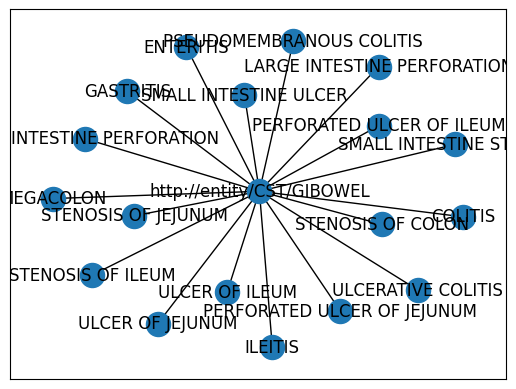

In [104]:
pos=nx.spring_layout(G2)
nx.draw_networkx_nodes(G2, pos)
nx.draw_networkx_edges(G2, pos)
nx.draw_networkx_labels(G2, pos)
plt.show()

In [73]:
df.rename(columns={'Preferred Label': 'Label'}, inplace=True)
df.rename(columns={'Class ID': 'ID'}, inplace=True)

In [71]:
df.columns[1]

'Preferred Label'

In [106]:
query=f"""
select parents,COUNT(*) as Childs
from df
Group BY parents
"""

res=duckdb.sql(query).df().sort_values('Childs')
res

,Parents,Childs
720,http://entity/CST/SS/EYE/GEN|http://entity/CST...,1
313,http://entity/STY/T121,1
312,http://entity/CST/GENSIGNS|http://entity/CST/P...,1
546,http://entity/CST/SKIN/SUBQ|http://entity/CST/...,1
547,http://entity/CST/BODY/GEN|http://entity/CST/P...,1
...,...,...
2,http://entity/CST/NER,18
457,http://entity/CST/MAN/ION,19
637,http://entity/CST/PATH,22
464,http://www.w3.org/2002/07/owl#Thing,24


In [109]:
id=df[df['Parents']==None]
id

,Class ID,Preferred Label,Parents


In [ ]:

def load_ontology(file_path):
    """
    Charger les données et construire un graphe orienté.
    """
    graph = nx.DiGraph()
    with open(file_path, 'r') as f:
        reader = csv.DictReader(f)
        for row in reader:
            entity_id = row['Class ID']
            parents = row['Parents'].split('|')
            graph.add_node(entity_id, label=row['Preferred Label'])
            for parent in parents:
                if parent.strip():  # Si le parent existe
                    graph.add_edge(parent.strip(), entity_id)
    return graph

In [78]:
file="./onto_x.csv"
G = nx.DiGraph()
G.graph['name'] = "Ontologie des entités"
nx.write_graphml(G, "./onto_x_graph.graphml")
print(load_ontology(file))

DiGraph with 1708 nodes and 2967 edges


In [70]:
df

,Class ID,Preferred Label,Parents
0,http://entity/CST/HYPOCHLOREM,HYPOCHLOREMIA,http://entity/CST/METGEN|http://entity/CST/MAN...
1,http://entity/CST/EXTRAPYR%20SYND,EXTRAPYRAMIDAL SYNDROME,http://entity/CST/NERMOVE
2,http://entity/CST/VASCULITIS%20KIDNEY,KIDNEY VASCULITIS,http://entity/CST/PATHCOLLAGEN|http://entity/C...
3,http://entity/CST/SKIN/DERM,Dermatoses,NaN
4,http://entity/CST/FIBRO%20KIDNEY,KIDNEY FIBROSIS,http://entity/CST/UG/UT/K/M|http://entity/CST/...
...,...,...,...
1702,http://entity/STY/T122,Biomedical or Dental Material,http://entity/STY/T120
1703,http://entity/CST/WITHDRAW%20BLEED,WITHDRAWAL BLEEDING,http://entity/CST/HEMHMRG|http://entity/CST/GY...
1704,http://entity/CST/GYNECOMASTIA,GYNECOMASTIA,http://entity/CST/GENBREAST
1705,http://entity/CST/ENDO/ADR/COR,Cortex,http://entity/CST/ENDO/ADR


/var/folders/1z/td0cn43115zgm1015jzzbhc40000gn/T/ipykernel_72534/387860314.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


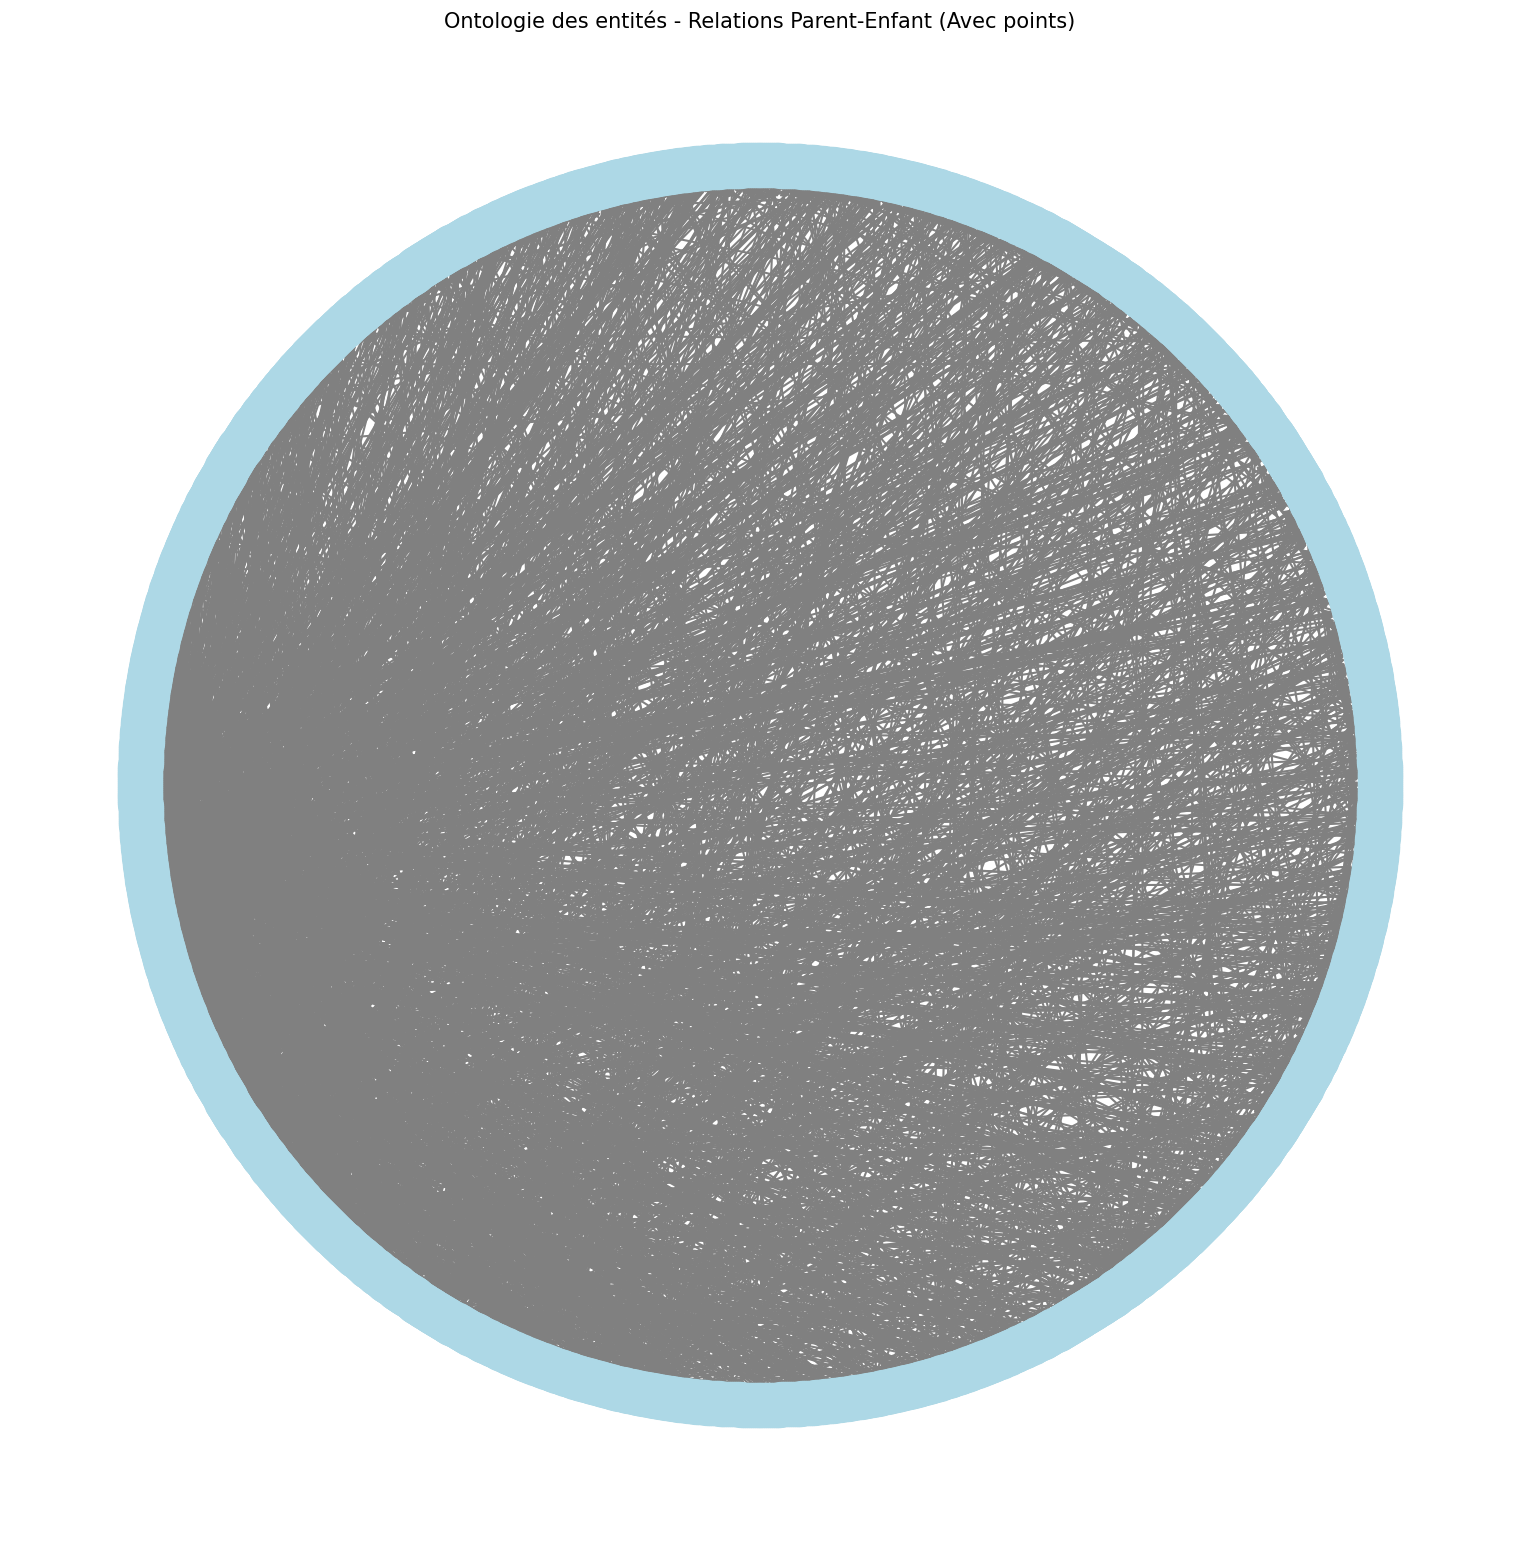

In [77]:
# Créer un graphe dirigé
G = nx.DiGraph()

# Ajouter les entités et les relations (parents)
for index, row in df.iterrows():
    entity = row['Label']
    
    # Vérifier si 'Parents' est une chaîne ou NaN et le traiter correctement
    if isinstance(row['Parents'], str):
        parents = row['Parents'].split('|')
    else:
        parents = []  # Si 'Parents' est NaN ou autre type non-str, on passe à un tableau vide
    
    for parent in parents:
        G.add_edge(parent, entity)  # Ajouter une arête du parent à l'entité

# Visualiser le graphe avec points seulement
plt.figure(figsize=(15, 15))

# Utiliser un layout basé sur les couches pour mieux séparer les niveaux
pos = nx.shell_layout(G)

# Dessiner le graphe avec seulement des points (sans les labels)
nx.draw(G, pos, with_labels=False, node_size=1000, node_color="lightblue", font_size=12, font_weight="bold", arrows=True, edge_color="gray", width=1.5)

# Ajouter un titre
plt.title("Ontologie des entités - Relations Parent-Enfant (Avec points)", size=15)

# Ajuster les marges et afficher
plt.tight_layout()
plt.show()


In [79]:
graph=load_ontology('./onto_x.csv')

In [80]:
def get_entity_relationships(graph, entity_id):
    """
    Retourner les ancêtres (directs et indirects) et leurs profondeurs.
    """
    if entity_id not in graph:
        raise ValueError(f"Entity {entity_id} not found in the ontology.")
    
    # Trouver tous les ancêtres et leurs distances
    relationships = nx.single_source_shortest_path_length(graph.reverse(), entity_id)
    return relationships


In [92]:
rel=get_entity_relationships(graph,"http://entity/CST/NERMOVE")#"http://entity/CST/HYPOCHLOREM")
rel

{'http://entity/CST/NERMOVE': 0,
 'http://entity/CST/NER': 1,
 'http://www.w3.org/2002/07/owl#Thing': 2}

In [ ]:
# Fonction pour trouver tous les parents
def find_all_parents(entity_id, df):
    parents = {}
    depth = 0
    current_entity = entity_id
    
    while current_entity:
        # Trouver la ligne correspondant à l'entité actuelle
        row = df[df['ID'] == current_entity]
        
        if row.empty:
            break  # Plus de parent à explorer
        
        # Récupérer le parent direct
        parent = row['Parents'].values[0]
        
        if parent:
            # Ajouter le parent au dictionnaire avec la profondeur
            parents[parent] = depth + 1
            depth += 1
            current_entity = parent  # Continuer avec le parent
        else:
            break  # Pas de parent (racine atteinte)
    
    return parents

# Entité à analyser
entity_id = 'http://entity/CST/CERVIX%20DIS'

# Trouver tous les parents et leurs profondeurs
parents = find_all_parents(entity_id, df)
print(parents)


In [112]:
with open('./data.csv', 'r') as f:
        reader = csv.DictReader(f)
        for row in reader:
            parents = row['Parents'].split('|')
            print(parents)
            print(row)

KeyError: 'Parents'